In [1]:
import sys; sys.path.append("..")
from setupTest import setupJupyter, addOrderParameter; setupJupyter()

from __future__ import division
from collections import OrderedDict
import itertools
from mpl_toolkits.mplot3d import Axes3D
import h5py
import os
import re
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4)})
plotStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0}
stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
scatterStyles={"s":100,"marker":"x","linewidth":3.0}
np.seterr(divide='ignore',invalid='ignore')

Populating the interactive namespace from numpy and matplotlib


### Execute with time limit.

In [3]:
%%bash
dirname=data/1
filename=${dirname}/bimolecular_with_limits.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} bimolecular_with_limits.sbml
lm_setp ${filename} writeInterval=1e-2 maxTime=1e-1

lm_sbml_import v2018.02 build 
Copyright (C) 2012-2018 Roberts Group, Johns Hopkins University.
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.


2018-04-05 22:54:30) SBML L3V1 Importer processing document.
2018-04-05 22:54:30) Processing 1 compartments.
2018-04-05 22:54:30) Added compartment (0) V: 1.000000e+00 L
2018-04-05 22:54:30) Processing 6 species.
2018-04-05 22:54:30) Added species (0) a with initial count: 500
2018-04-05 22:54:30) Added species (1) b with initial count: 500
2018-04-05 22:54:30) Added species (2) c with initial count: 500
2018-04-05 22:54:30) Added species (3) d with initial count: 50
2018-04-05 22:54:30) Added species (4) e with initial count: 50
2018-04-05 22:54:30) Added species (5) f with initial count: 50
2018-04-05 22:54:30) Processing 4 reactions.
2018-04-05 22:54:30) Matched kinetic formula in reaction  (0) to SecondOrderPropensity: [0.002 * a * b] == [k1 * x1 * x2]
2018-04-05 22:54:30) Matched kinetic formula

In [4]:
dirname="data/1"
filename="%s/bimolecular_with_limits.lm"%dirname
addOrderParameter(filename,0,2,(0,3),(1/1000,1/100))

Adding order parameters to data/1/bimolecular_with_limits.lm


In [5]:
%%bash
dirname=data/1
filename=${dirname}/bimolecular_with_limits.lm
#lmes -r 1-1 -f ${filename} -gr 0 -c 2
lmes -r 1-4 -f ${filename} -gr 0 -c 2 -sl lm::avx::GillespieDSolverAVX
#> ${filename}.log

Execute the following command in /Users/tel/git/lm_ndarray/regression/bimolecular_with_limits:
Lattice Microbe ES v2018.02 RELEASE build  in 64-bit mode with options AVX SBML.
Copyright (C) 2012-2018 Roberts Group, Johns Hopkins University.
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.

2018-04-05 22:54:35) saving simulation output (in hdf5 format) to: data/1/bimolecular_with_limits.lm
2018-04-05 22:54:35) Initializing communications library.
2018-04-05 22:54:35) Using local communicator on host tels_macbook.
2018-04-05 22:54:35) Resource controller @1 started.
2018-04-05 22:54:35) Parsed the following user-defined simulation parameters:
                 KEY                VALUE
             maxTime                  0.1
       writeInterval                 0.01

2018-04-05 22:54:35) Supervisor @0 started.
2018-04-05 22:54:35) Resource controller @1 on tels_macbook registered with 8 cpu core(s) and 0 gpu device(s).
2018-04-05 22:54:35) Regist

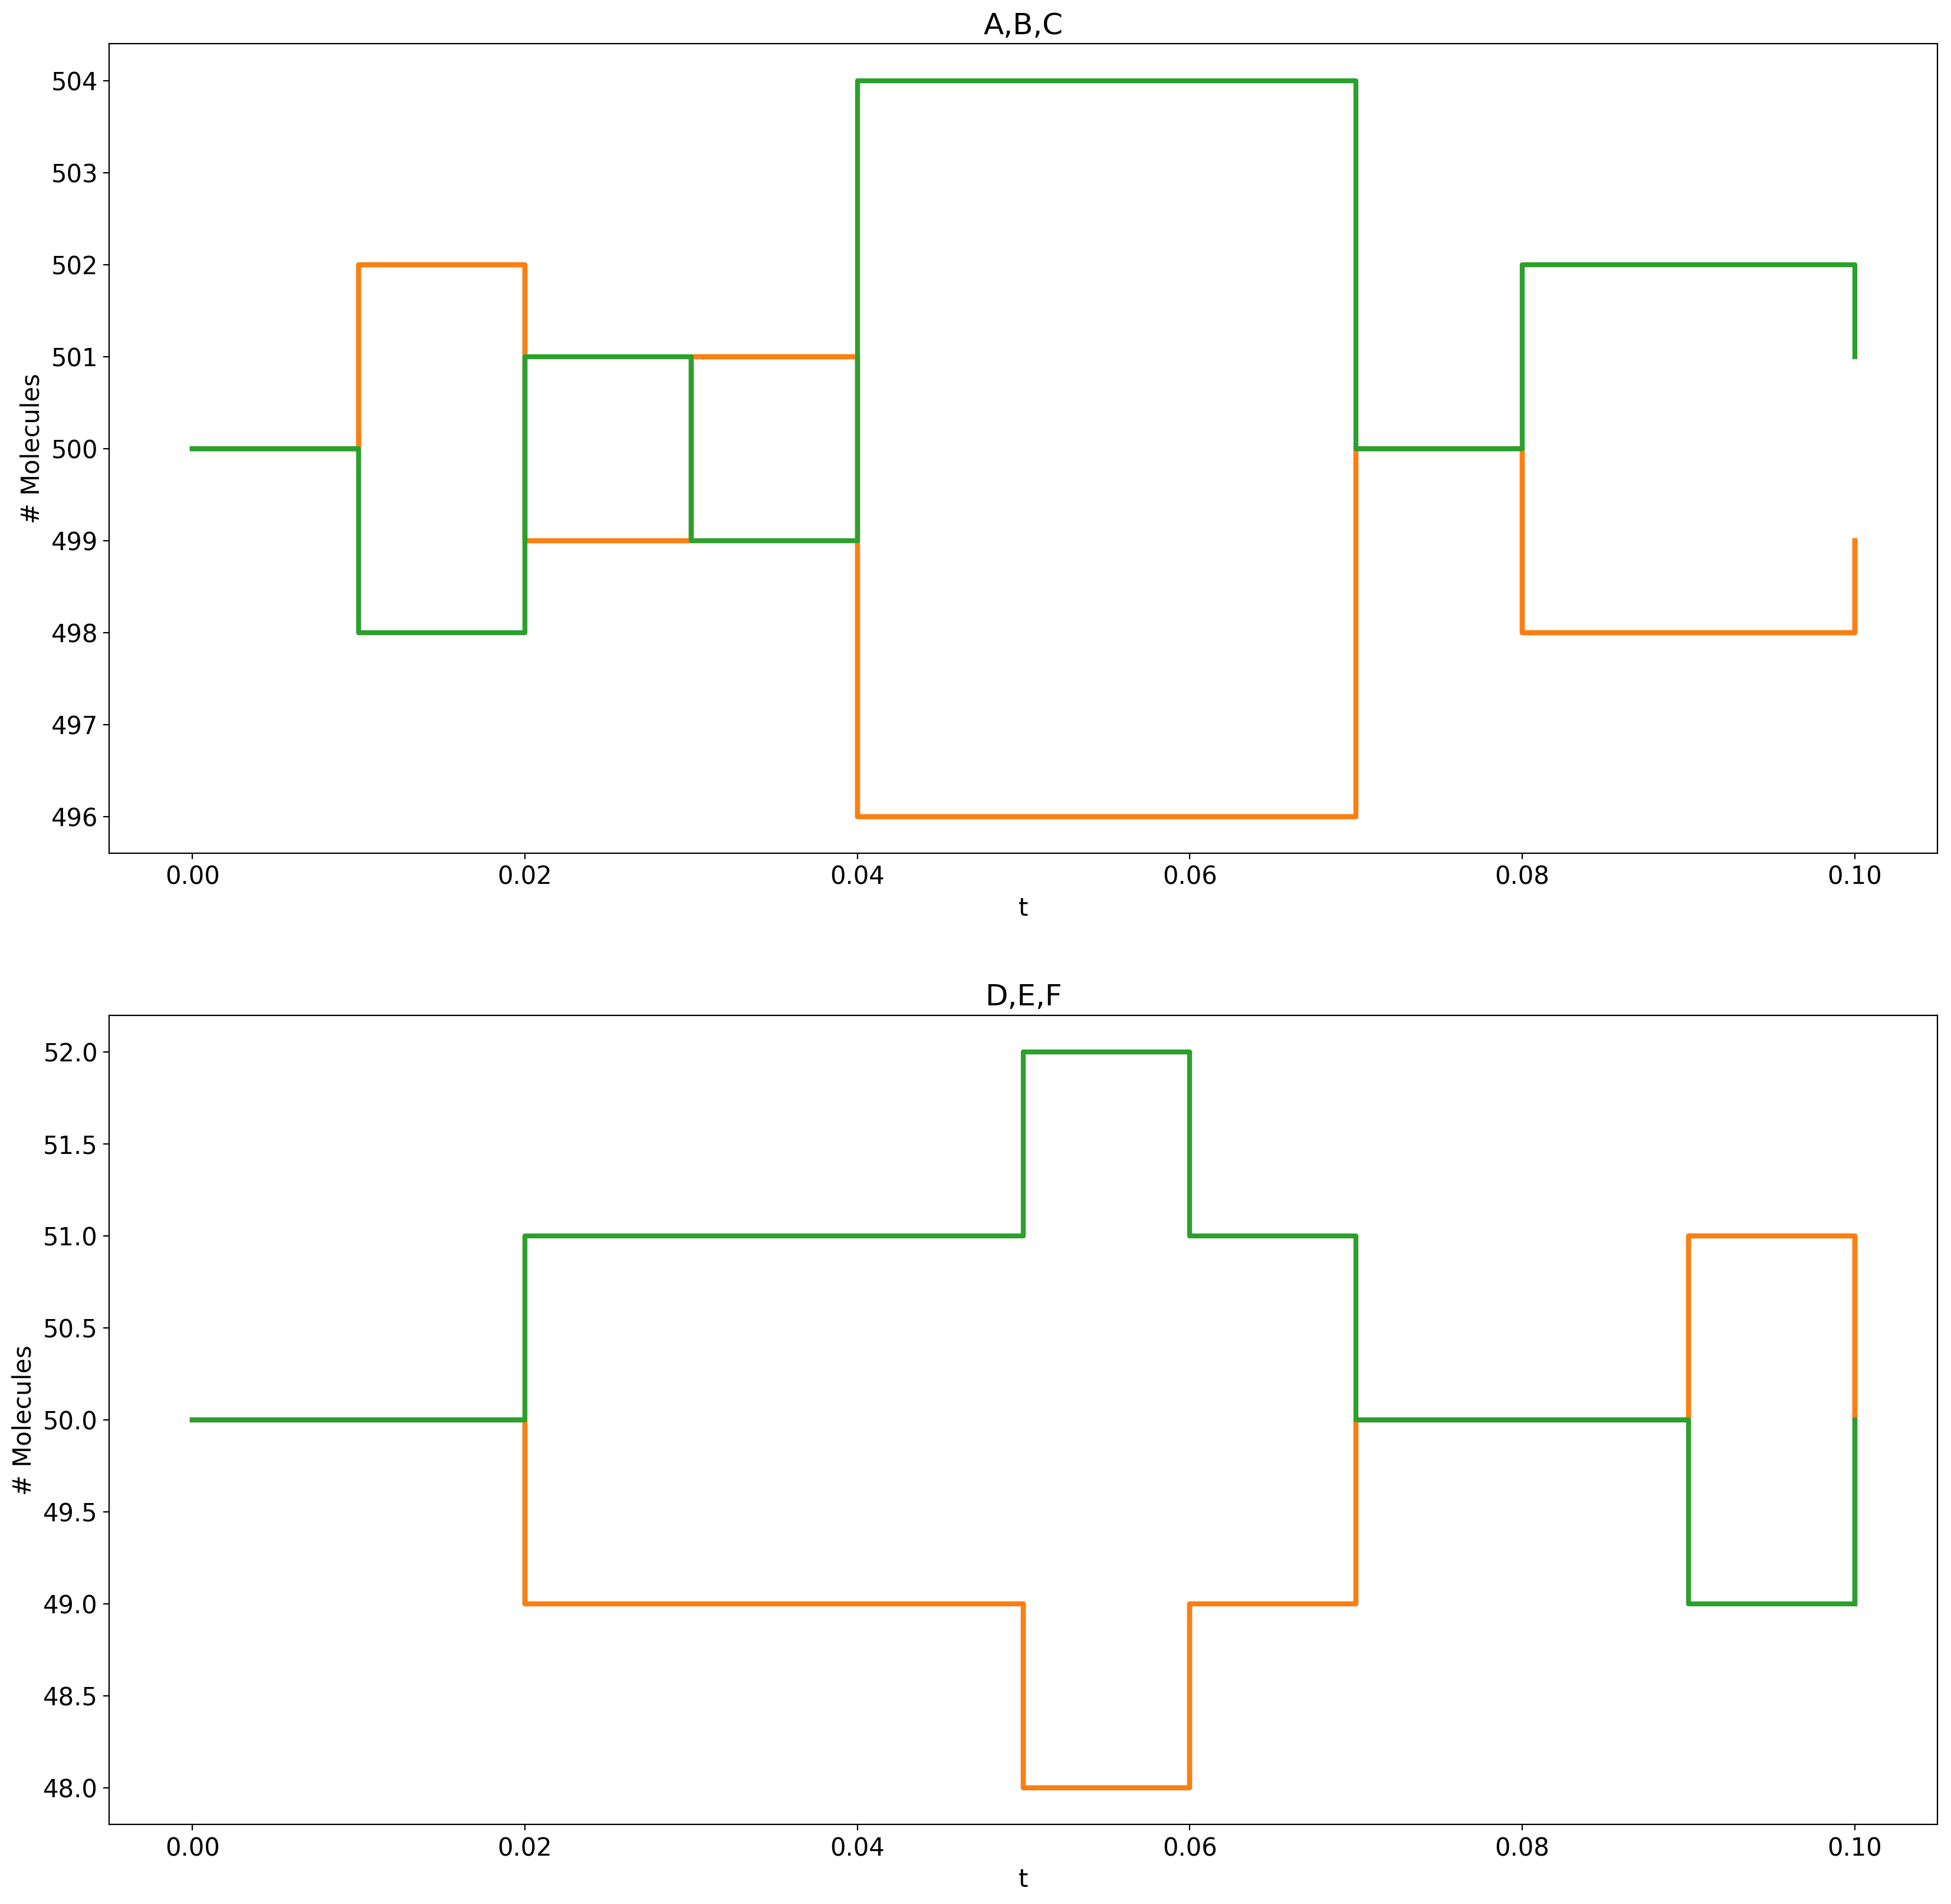

In [6]:
# Plot the time series for a single replicate.
dirname="data/1"
filename="%s/bimolecular_with_limits.lm"%dirname
fp = h5py.File(filename, "r")
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (20,20)})
for replicate in (1,):
    counts=np.array(fp["/Simulations/%07d/SpeciesCounts"%replicate], dtype=double)
    times=np.array(fp["/Simulations/%07d/SpeciesCountTimes"%replicate], dtype=double)
    plt.subplot(2,1,1)
    step(times,counts[:,0], **stepStyles)
    step(times,counts[:,1], **stepStyles)
    step(times,counts[:,2], **stepStyles)
    xlabel('t'); ylabel('# Molecules'); title("A,B,C")
    plt.subplot(2,1,2)
    step(times,counts[:,3], **stepStyles)
    step(times,counts[:,4], **stepStyles)
    step(times,counts[:,5], **stepStyles)
    xlabel('t'); ylabel('# Molecules'); title("D,E,F")
pass

### Execute with species upper limit.

In [8]:
%%bash
dirname=data/2
filename=${dirname}/bimolecular_with_limits.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} bimolecular_with_limits.sbml
lm_setp ${filename} writeInterval=1e3 maxTime=1e4 "speciesUpperLimitList=2:550,5:65"

lm_sbml_import v2018.02 build 
Copyright (C) 2012-2018 Roberts Group, Johns Hopkins University.
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.


2018-04-05 23:01:15) SBML L3V1 Importer processing document.
2018-04-05 23:01:15) Processing 1 compartments.
2018-04-05 23:01:15) Added compartment (0) V: 1.000000e+00 L
2018-04-05 23:01:15) Processing 6 species.
2018-04-05 23:01:15) Added species (0) a with initial count: 500
2018-04-05 23:01:15) Added species (1) b with initial count: 500
2018-04-05 23:01:15) Added species (2) c with initial count: 500
2018-04-05 23:01:15) Added species (3) d with initial count: 50
2018-04-05 23:01:15) Added species (4) e with initial count: 50
2018-04-05 23:01:15) Added species (5) f with initial count: 50
2018-04-05 23:01:15) Processing 4 reactions.
2018-04-05 23:01:15) Matched kinetic formula in reaction  (0) to SecondOrderPropensity: [0.002 * a * b] == [k1 * x1 * x2]
2018-04-05 23:01:15) Matched kinetic formula

In [9]:
dirname="data/2"
filename="%s/bimolecular_with_limits.lm"%dirname
addOrderParameter(filename,0,2,(0,3),(1/1000,1/100))

Adding order parameters to data/2/bimolecular_with_limits.lm


In [10]:
%%bash
dirname=data/2
filename=${dirname}/bimolecular_with_limits.lm
#lmes -r 1-1000 -f ${filename} -gr 0 -c 4 # > ${filename}.log
lmes -r 1-1000 -f ${filename} -gr 0 -c 4 -sl lm::avx::GillespieDSolverAVX > ${filename}.log
echo "Finished."

done


1000 replicates


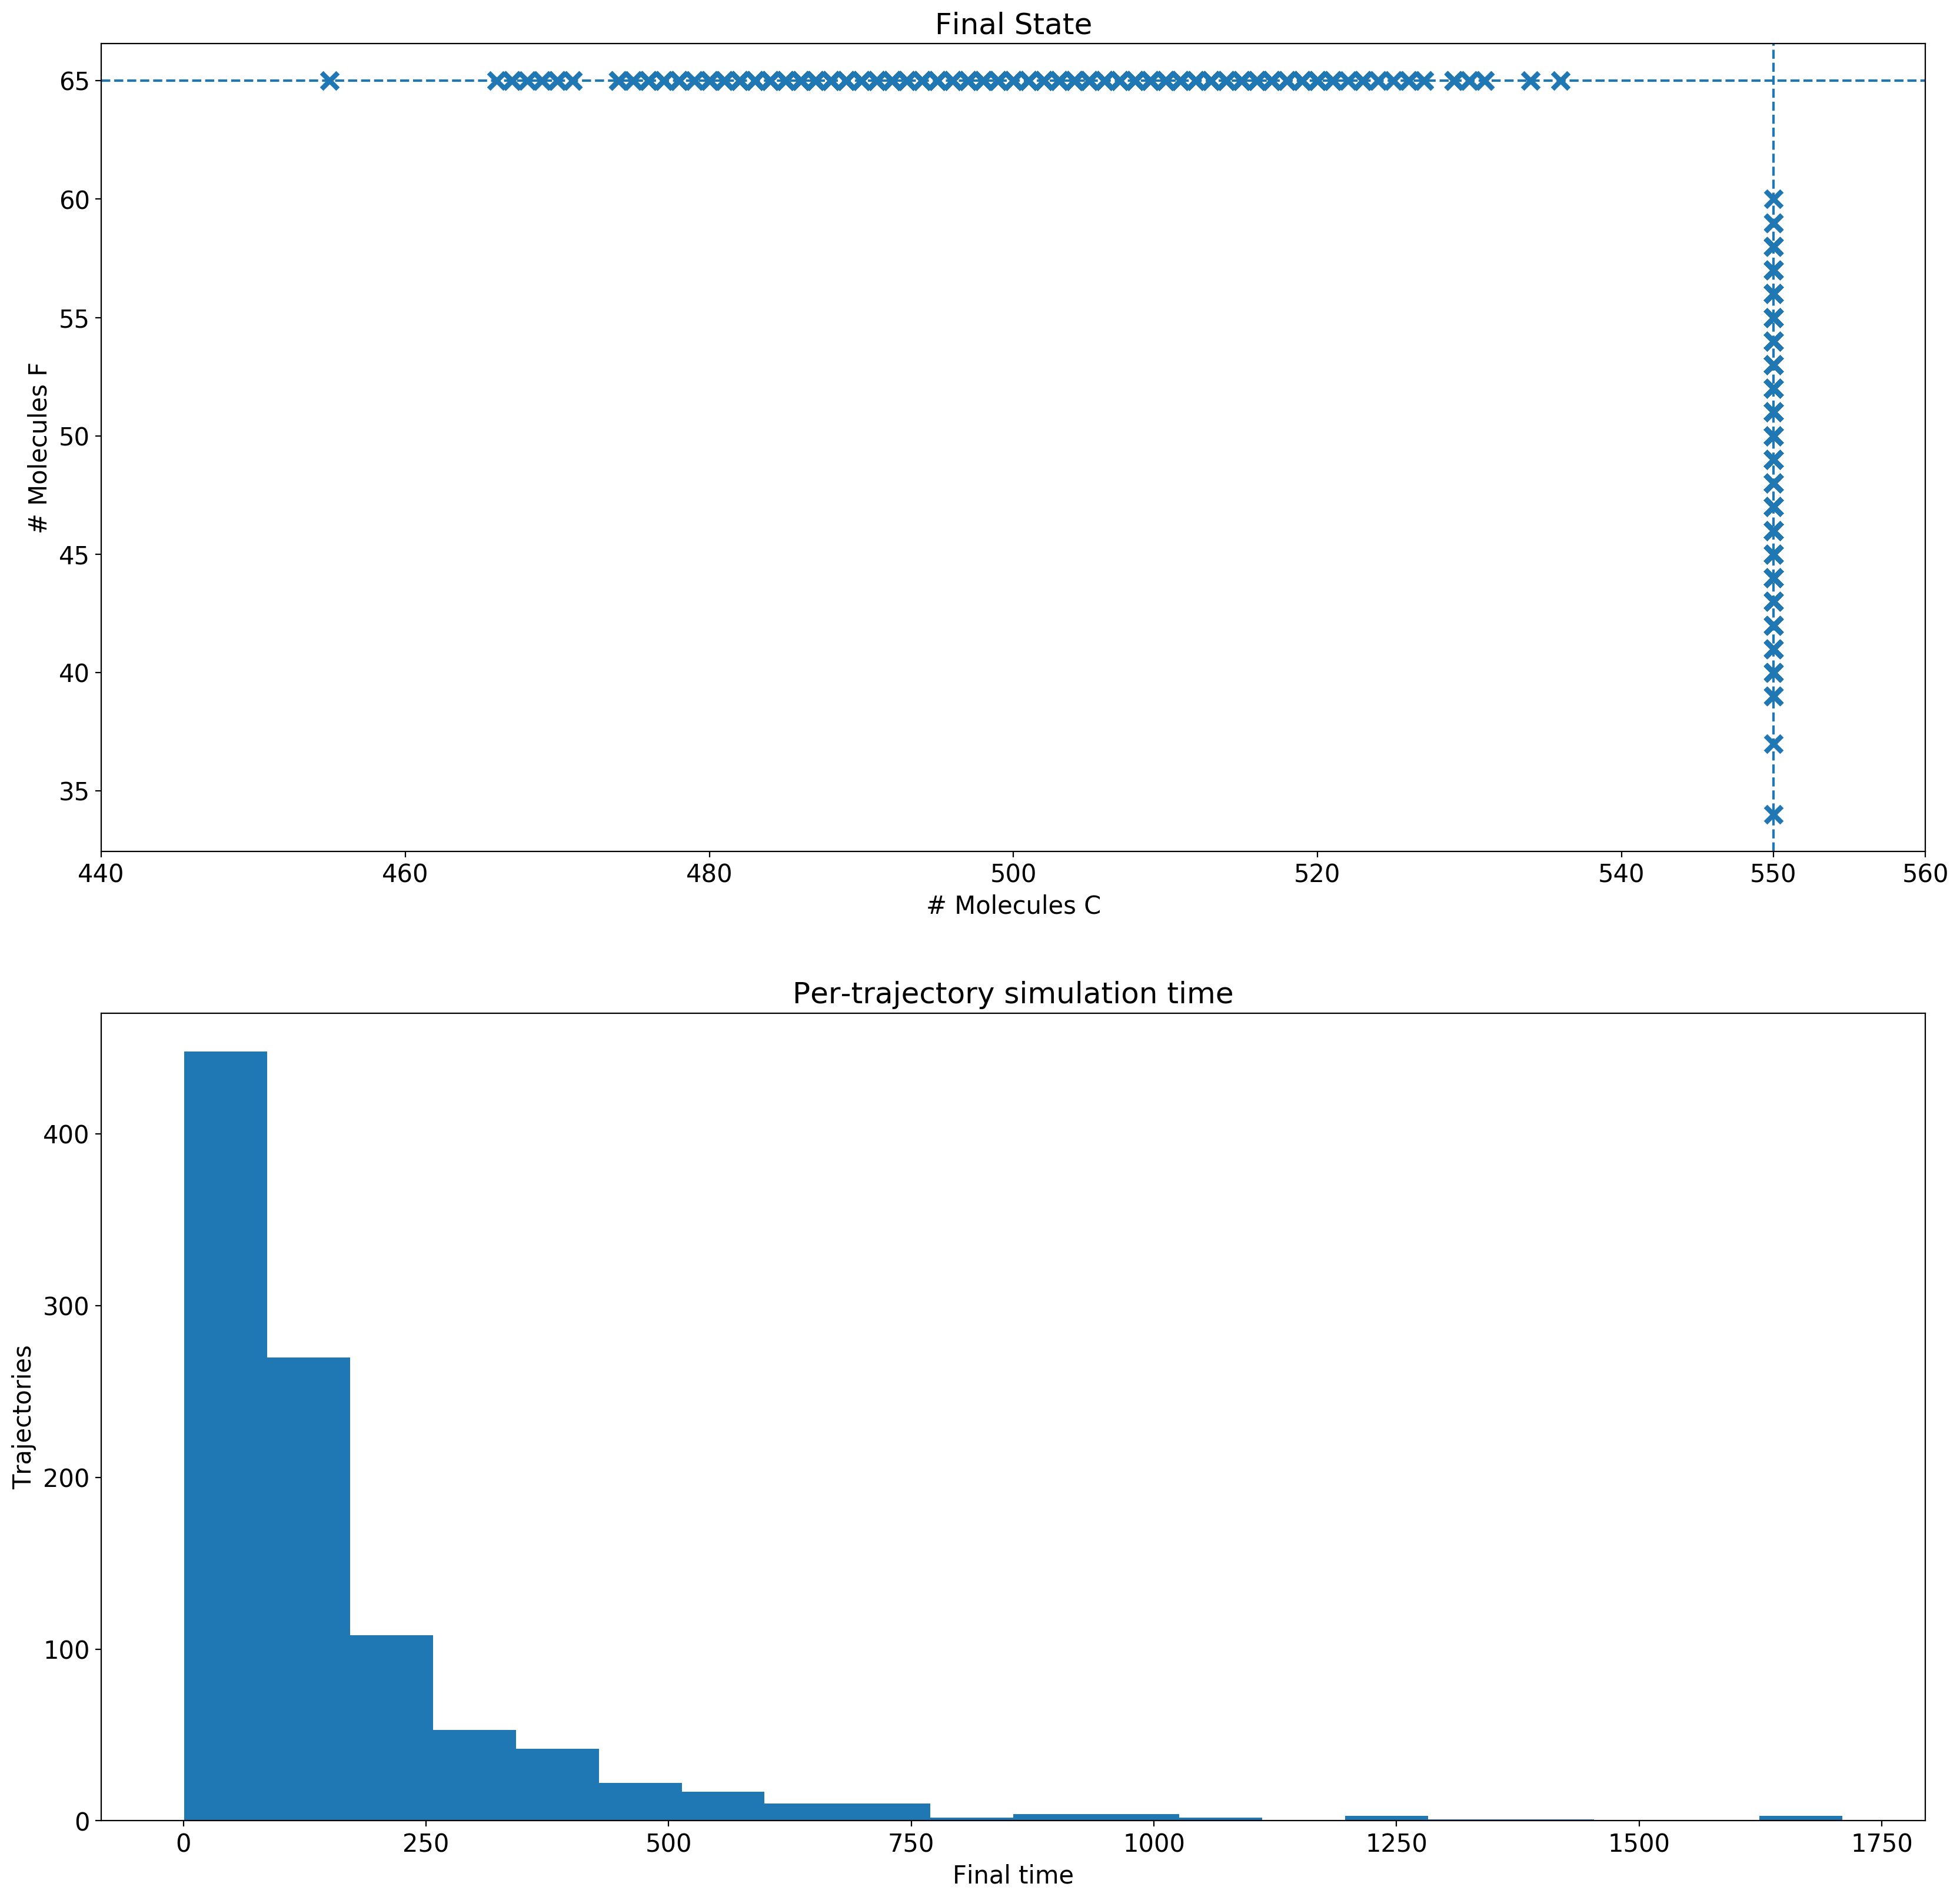

In [17]:
# Plot the time series for a single replicate.
dirname="data/2"
filename="%s/bimolecular_with_limits.lm"%dirname
fp = h5py.File(filename, "r")
replicates=fp["/Simulations"].keys()
print "%d replicates"%len(replicates)
c1=[]
c2=[]
t=[]
for replicate in replicates:
    counts=np.array(fp["/Simulations/%s/SpeciesCounts"%replicate], dtype=double)
    times=np.array(fp["/Simulations/%s/SpeciesCountTimes"%replicate], dtype=double)
    c1.append(counts[-1,2])
    c2.append(counts[-1,5])
    t.append(times[-1])
    if times[-1] >= 1e4:
        print times[-1]
fp.close()
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (20,20)})
plt.subplot(2,1,1)
plt.scatter(c1,c2, **scatterStyles); axhline(65, ls='dashed'); axvline(550, ls='dashed')
xlabel('# Molecules C'); xticks(list(xticks()[0]) + [550]); ylabel('# Molecules F'); title("Final State")
plt.subplot(2,1,2)
hist(t,20)
xlabel('Final time'); ylabel('Trajectories'); title("Per-trajectory simulation time")
pass

### Execute with species lower limit

In [18]:
%%bash
dirname=data/3
filename=${dirname}/bimolecular_with_limits.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} bimolecular_with_limits.sbml
lm_setp ${filename} writeInterval=1e3 maxTime=1e4 "speciesLowerLimitList=2:450,5:35"

lm_sbml_import v2018.02 build 
Copyright (C) 2012-2018 Roberts Group, Johns Hopkins University.
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.


2018-04-05 23:10:30) SBML L3V1 Importer processing document.
2018-04-05 23:10:30) Processing 1 compartments.
2018-04-05 23:10:30) Added compartment (0) V: 1.000000e+00 L
2018-04-05 23:10:30) Processing 6 species.
2018-04-05 23:10:30) Added species (0) a with initial count: 500
2018-04-05 23:10:30) Added species (1) b with initial count: 500
2018-04-05 23:10:30) Added species (2) c with initial count: 500
2018-04-05 23:10:30) Added species (3) d with initial count: 50
2018-04-05 23:10:30) Added species (4) e with initial count: 50
2018-04-05 23:10:30) Added species (5) f with initial count: 50
2018-04-05 23:10:30) Processing 4 reactions.
2018-04-05 23:10:30) Matched kinetic formula in reaction  (0) to SecondOrderPropensity: [0.002 * a * b] == [k1 * x1 * x2]
2018-04-05 23:10:30) Matched kinetic formula

In [19]:
dirname="data/3"
filename="%s/bimolecular_with_limits.lm"%dirname
addOrderParameter(filename,0,2,(0,3),(1/1000,1/100))

Adding order parameters to data/3/bimolecular_with_limits.lm


In [112]:
%%bash
dirname=data/3
filename=${dirname}/bimolecular_with_limits.lm
lmes -r 1-1000 -f ${filename} -gr 0 -c 4 > ${filename}.log
# lmes -r 1-1000 -f ${filename} -gr 0 -c 4 -sl lm::avx::GillespieDSolverAVX > ${filename}.log
echo "Finished."

Execute the following command in /Users/eroberts/Work/Lab/Git/LatticeMicrobesES/regression/bimolecular_with_limits:
Finished.


1000 replicates


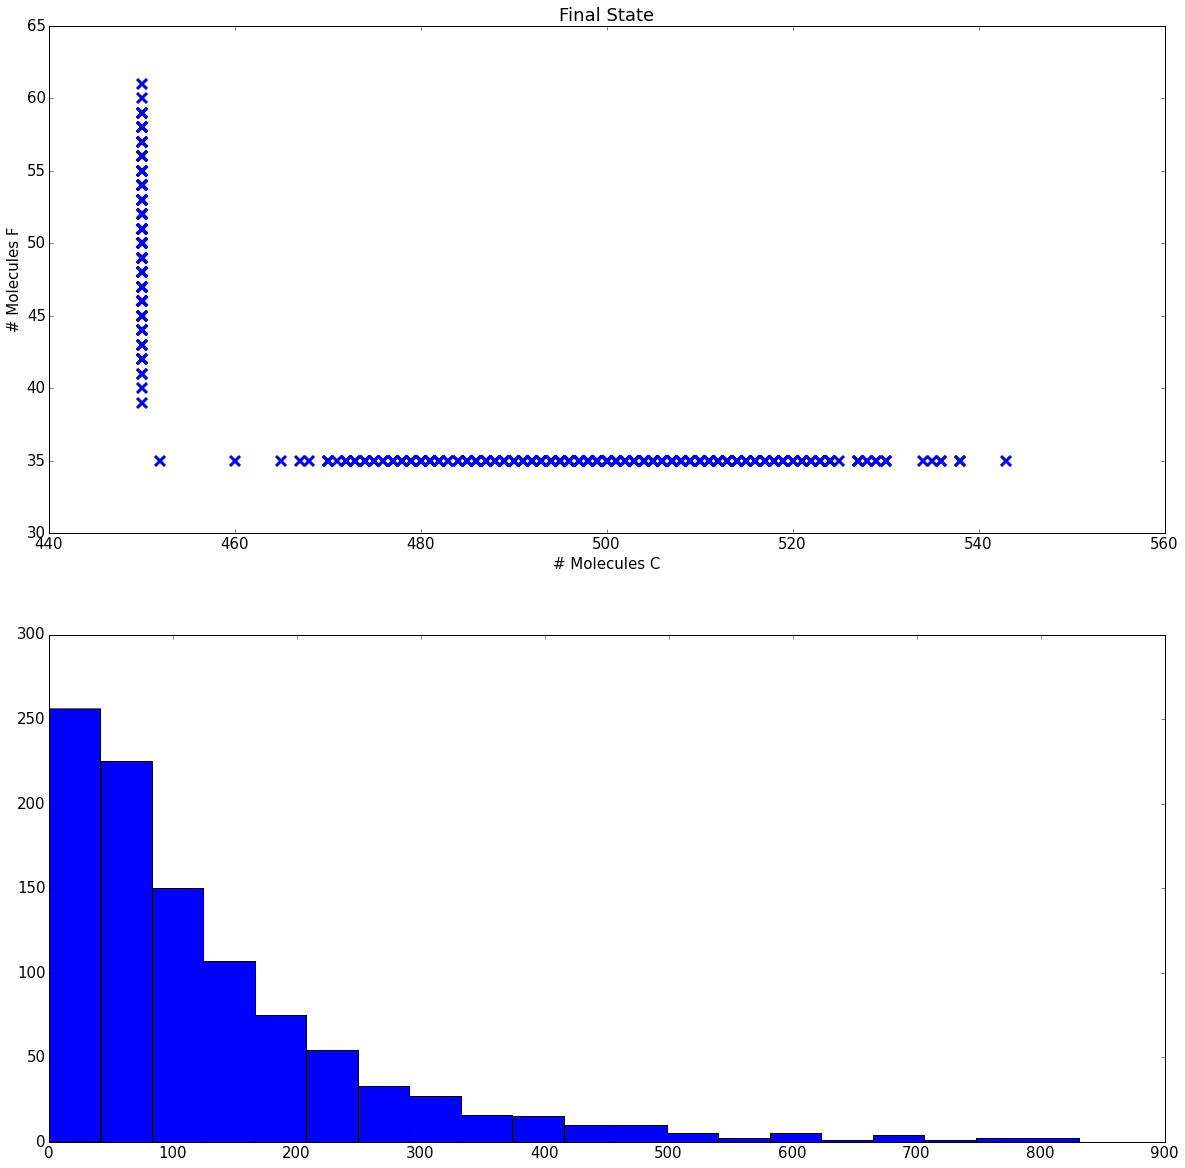

In [113]:
# Plot the time series for a single replicate.
dirname="data/3"
filename="%s/bimolecular_with_limits.lm"%dirname
fp = h5py.File(filename, "r")
replicates=fp["/Simulations"].keys()
print "%d replicates"%len(replicates)
c1=[]
c2=[]
t=[]
for replicate in replicates:
    counts=np.array(fp["/Simulations/%s/SpeciesCounts"%replicate], dtype=double)
    times=np.array(fp["/Simulations/%s/SpeciesCountTimes"%replicate], dtype=double)
    c1.append(counts[-1,2])
    c2.append(counts[-1,5])
    t.append(times[-1])
    if times[-1] >= 1e4:
        print times[-1]
fp.close()
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (20,20)})
plt.subplot(2,1,1)
plt.scatter(c1,c2, **scatterStyles)
xlabel('# Molecules C'); ylabel('# Molecules F'); title("Final State")
plt.subplot(2,1,2)
hist(t,20)
pass

### Execute with order parameter upper limit

In [145]:
%%bash
dirname=data/4
filename=${dirname}/bimolecular_with_limits.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} bimolecular_with_limits.sbml
lm_setp ${filename} writeInterval=1e3 maxTime=1e4 "orderParameterUpperLimitList=0:1.2"

lm_sbml_import v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.
lm_setp v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group,
University of Illinois at Urbana-Champaign.

Setting parameters in simulation file data/4/bimolecular_with_limits.lm:
maxTime=1e4
orderParameterUpperLimitList=0:1.2
writeInterval=1e3
Done.


In [146]:
dirname="data/4"
filename="%s/bimolecular_with_limits.lm"%dirname
addOrderParameter(filename,0,2,(2,5),(1/1000,1/100))

Adding order parameters to data/4/bimolecular_with_limits.lm


In [147]:
%%bash
dirname=data/4
filename=${dirname}/bimolecular_with_limits.lm
echo "Execute the following command in `pwd`:"
#lmes -r 1-1000 -f ${filename} -gr 0 -c 6 > ${filename}.log
lmes -r 1-50 -f ${filename} -gr 0 -c 6 -sl lm::avx::GillespieDSolverAVX > ${filename}.log
echo "Finished."

Execute the following command in /Users/eroberts/Work/Lab/Git/LatticeMicrobesES/regression/bimolecular_with_limits:
Finished.


1000 replicates
641 replciates hit max time before the limit


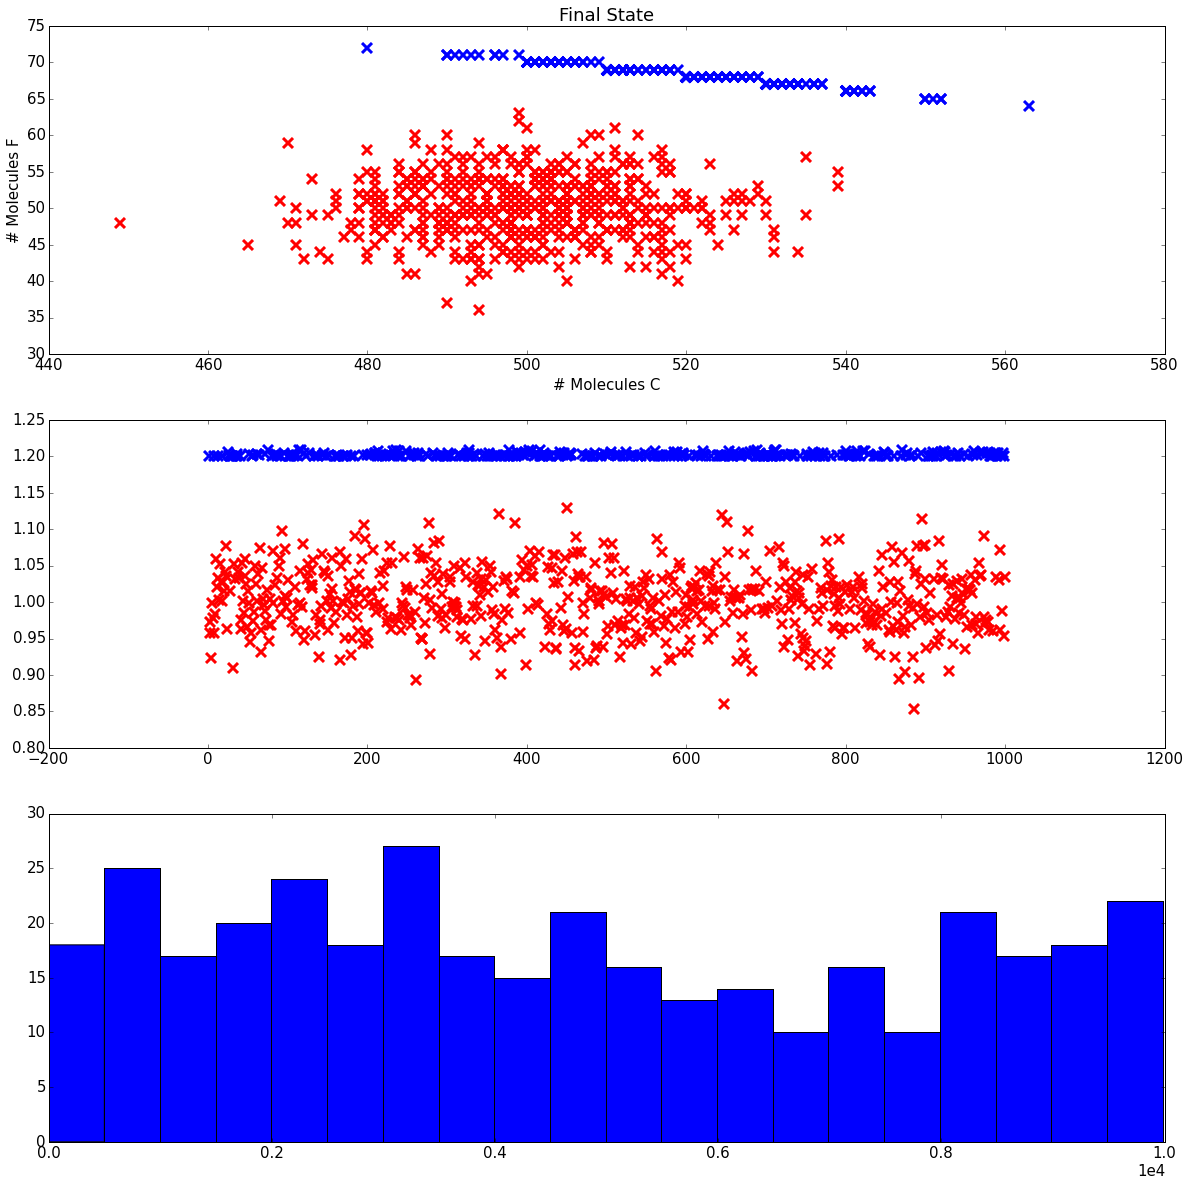

In [148]:
# Plot the distrbituino of final species counts.
dirname="data/4"
filename="%s/bimolecular_with_limits.lm"%dirname
fp = h5py.File(filename, "r")
replicates=fp["/Simulations"].keys()
print "%d replicates"%len(replicates)
c1=[]
c2=[]
c1o=[]
c2o=[]
op1=[]
op2=[]
op1i=[]
op2i=[]
t=[]
overTime=0
for replicate in replicates:
    counts=np.array(fp["/Simulations/%s/SpeciesCounts"%replicate], dtype=double)
    times=np.array(fp["/Simulations/%s/SpeciesCountTimes"%replicate], dtype=double)
    if times[-1] < 1e4:
        t.append(times[-1])
        c1.append(counts[-1,2])
        c2.append(counts[-1,5])
        op1.append(counts[-1,2]/1000+counts[-1,5]/100)
        op1i.append(int(replicate))
    else:
        overTime += 1
        c1o.append(counts[-1,2])
        c2o.append(counts[-1,5])
        op2.append(counts[-1,2]/1000+counts[-1,5]/100)
        op2i.append(int(replicate))
print "%d replciates hit max time before the limit"%(overTime)
fp.close()
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (20,20)})
plt.subplot(3,1,1)
plt.scatter(c1,c2, **scatterStyles)
plt.scatter(c1o,c2o, c='r', **scatterStyles)
xlabel('# Molecules C'); ylabel('# Molecules F'); title("Final State")
plt.subplot(3,1,2)
plt.scatter(op1i,op1, **scatterStyles)
plt.scatter(op2i,op2, c='r', **scatterStyles)
plt.subplot(3,1,3)
hist(t,20)
pass

### Execute with a order parameter lower limit

In [158]:
%%bash
dirname=data/5
filename=${dirname}/bimolecular_with_limits.lm
mkdir -p ${dirname}
rm -f ${filename} && lm_sbml_import ${filename} bimolecular_with_limits.sbml
lm_setp ${filename} writeInterval=1e3 maxTime=1e4 "orderParameterLowerLimitList=0:0.8"

lm_sbml_import v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.
lm_setp v2016.01.20 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group,
University of Illinois at Urbana-Champaign.

Setting parameters in simulation file data/5/bimolecular_with_limits.lm:
maxTime=1e4
orderParameterLowerLimitList=0:0.8
writeInterval=1e3
Done.


In [159]:
dirname="data/5"
filename="%s/bimolecular_with_limits.lm"%dirname
addOrderParameter(filename,0,2,(2,5),(1/1000,1/100))

Adding order parameters to data/5/bimolecular_with_limits.lm


In [160]:
%%bash
dirname=data/5
filename=${dirname}/bimolecular_with_limits.lm
echo "Execute the following command in `pwd`:"
#lmes -r 1-1000 -f ${filename} -gr 0 -c 6 > ${filename}.log
lmes -r 1-50 -f ${filename} -gr 0 -c 6 -sl lm::avx::GillespieDSolverAVX > ${filename}.log
echo "Finished."

Execute the following command in /Users/eroberts/Work/Lab/Git/LatticeMicrobesES/regression/bimolecular_with_limits:
Finished.


1000 replicates
383 replciates hit max time before the limit


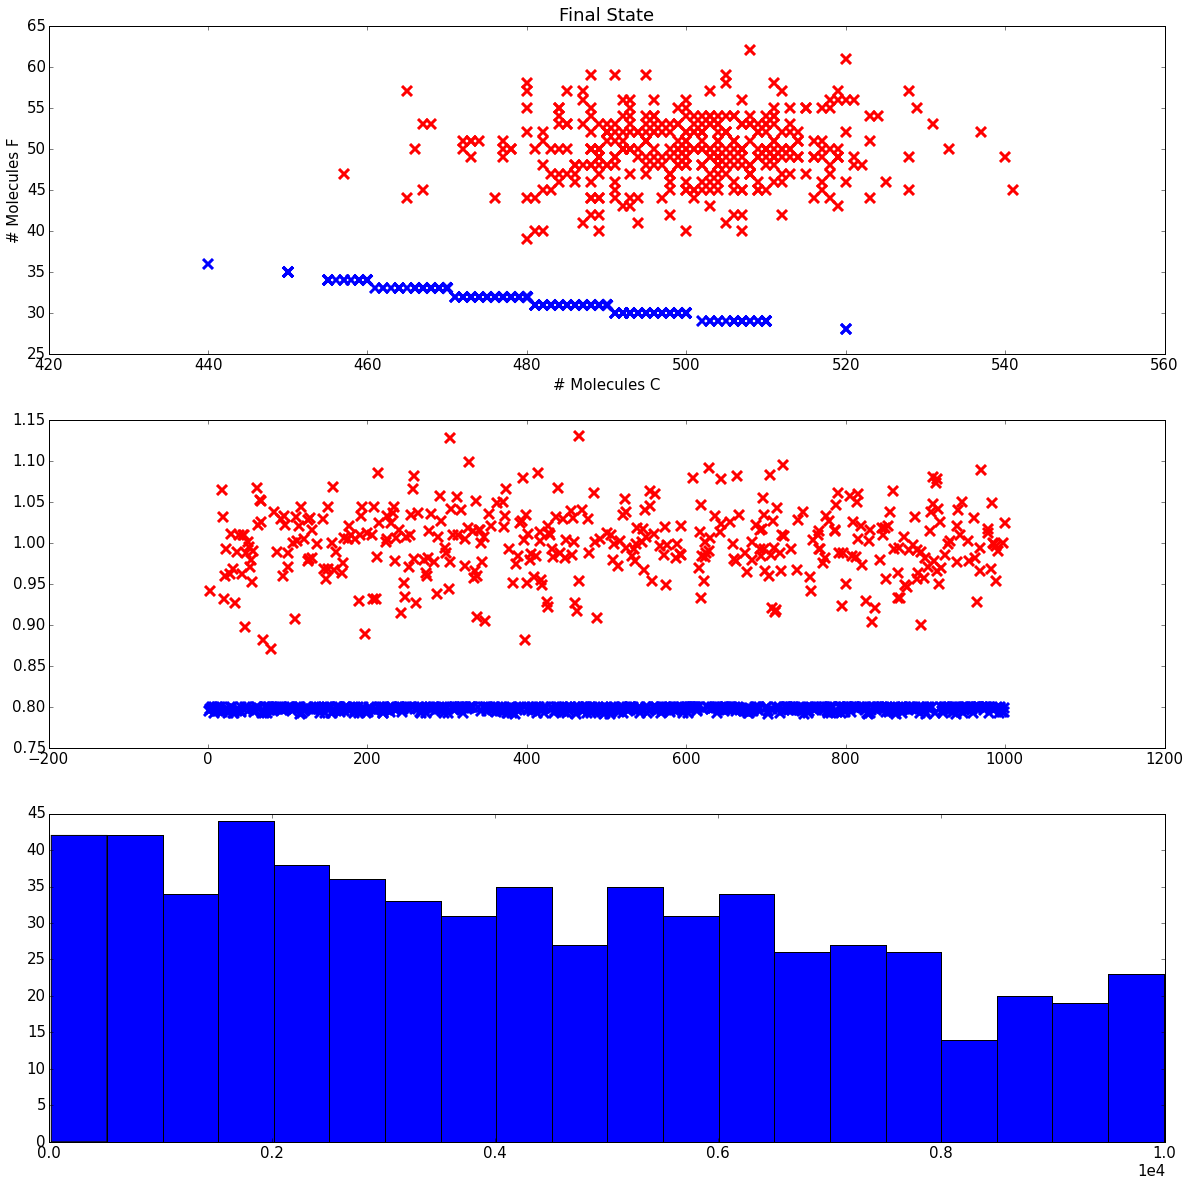

In [161]:
# Plot the distribution of final species counts.
dirname="data/5"
filename="%s/bimolecular_with_limits.lm"%dirname
fp = h5py.File(filename, "r")
replicates=fp["/Simulations"].keys()
print "%d replicates"%len(replicates)
c1=[]
c2=[]
c1o=[]
c2o=[]
op1=[]
op2=[]
op1i=[]
op2i=[]
t=[]
overTime=0
for replicate in replicates:
    counts=np.array(fp["/Simulations/%s/SpeciesCounts"%replicate], dtype=double)
    times=np.array(fp["/Simulations/%s/SpeciesCountTimes"%replicate], dtype=double)
    if times[-1] < 1e4:
        t.append(times[-1])
        c1.append(counts[-1,2])
        c2.append(counts[-1,5])
        op1.append(counts[-1,2]/1000+counts[-1,5]/100)
        op1i.append(int(replicate))
    else:
        overTime += 1
        c1o.append(counts[-1,2])
        c2o.append(counts[-1,5])
        op2.append(counts[-1,2]/1000+counts[-1,5]/100)
        op2i.append(int(replicate))
print "%d replciates hit max time before the limit"%(overTime)
fp.close()
matplotlib.rcParams.update({'font.size': 15, "figure.figsize": (20,20)})
plt.subplot(3,1,1)
plt.scatter(c1,c2, **scatterStyles)
plt.scatter(c1o,c2o, c='r', **scatterStyles)
xlabel('# Molecules C'); ylabel('# Molecules F'); title("Final State")
plt.subplot(3,1,2)
plt.scatter(op1i,op1, **scatterStyles)
plt.scatter(op2i,op2, c='r', **scatterStyles)
plt.subplot(3,1,3)
hist(t,20)
pass

### Performance comparison

#### Generate the input files and run a single performance test:

In [5]:
# test users should change the settings below as they desire

hostname = 'barkeri'                                  #'tel'
limitString = 'speciesLowerLimitList=0:10'    #'orderParameterLowerLimitList=0:0.6'
lmesPrefix = ''                                       #'/Users/tel/git/lm_mpi_thread_multiple/build/'
solver = 'lm::cme::GillespieDSolver'                  #lm::avx::GillespieDSolverAVX
testNamePrefix = 'perf'
testNumber = 103
testName = 'postmerge'

# setup the dirname and filename based on the user's settings. Don't modify
dirname = os.path.join(os.getcwd(), 'data/%s.%d.%s' % (testNamePrefix, testNumber, testName))
filename = os.path.join(dirname, "bimolecular_with_limits.lm")

In [6]:
# Some optional stuff to help name tests based on how they're set up

if 'avx' in solver.lower():
    testNamePrefix = '%s_avx' % testNamePrefix

limitName = ''
if 'species' in limitString.lower():
    limitName = 'sc_limit'
elif 'orderparameter' in limitString.lower():
    limitName = 'op_limit'
if limitName:
    testNamePrefix = '%s_%s' % (testNamePrefix, limitName)
    
# testNamePrefix, etc. have been modified, so regenerate dirname and filename
dirname = os.path.join(os.getcwd(), 'data/%s.%d.%s' % (testNamePrefix, testNumber, testName))
filename = os.path.join(dirname, "bimolecular_with_limits.lm")

In [9]:
%%bash_plus
mkdir -p $${dirname}
rm -f $${filename} && lm_sbml_import $${filename} bimolecular_with_limits.sbml
lm_setp $${filename} writeInterval=1e4 maxTime=1e5 $${limitString}

lm_sbml_import v2016.02.12 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.
lm_setp v2016.02.12 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group,
University of Illinois at Urbana-Champaign.

Setting parameters in simulation file /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_sc_limit.103.postmerge/bimolecular_with_limits.lm:
maxTime=1e5
speciesLowerLimitList=0:10
writeInterval=1e4
Done.


In [10]:
# add an order parameter to the simulation input file you just created
addOrderParameter(filename,0,2,(2,5),(1/1000,1/100))

Adding order parameters to /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_sc_limit.103.postmerge/bimolecular_with_limits.lm


In [ ]:
%%bash_plus --console_output
printf "Execute the following command in a terminal, or remove the '--echo' flag above to run within the notebook:\n\n";

for replicate in `seq -f "%g" 0 10`; do
    printf "Running ${replicate}\n";
    $${lmesPrefix}lmes -r 1-16 -f $${filename} -c 2 -gr 0 -ff null -sl $${solver}| tee $${filename}.$${hostname}.${replicate}.log;
done;

#### Generate the input files and run a batch of performance tests:

In [22]:
# generate a list of dictionaries with the appropriate variables for each test you want to run

hostname = 'tel'
testNamePrefix = 'perf'
firstTestNumber = 9989

limitStrings = ['speciesLowerLimitList=0:10', 'orderParameterLowerLimitList=0:0.6']

lmesPrefixes = ['/Users/tel/git/lm_main/build/', '/Users/tel/git/lm_mpi_thread_multiple/build/']
testNames = ['oldcode', 'newcode']

solvers = ['lm::cme::GillespieDSolver', 'lm::avx::GillespieDSolverAVX']

testDicts = []
testNumber = firstTestNumber
for limitString in limitStrings:
    for lmesPrefix,testName in zip(lmesPrefixes, testNames):
        for solver in solvers:
            testDict = {'hostname': hostname,
                        'limitString': limitString,
                        'lmesPrefix': lmesPrefix,
                        'solver': solver,
                        'testNamePrefix': testNamePrefix,
                        'testNumber': testNumber,
                        'testName': testName}
            
            if 'avx' in solver.lower():
                testDict['testNamePrefix'] = '%s_avx' % testDict['testNamePrefix']
            
            limitName = ''
            if 'species' in limitString.lower():
                limitName = 'sc_limit'
            elif 'orderparameter' in limitString.lower():
                limitName = 'op_limit'
            if limitName:
                testDict['testNamePrefix'] = '%s_%s' % (testDict['testNamePrefix'], limitName)
            
            testDict['dirname'] = os.path.join(os.getcwd(), 'data/%s.%d.%s' % (testDict['testNamePrefix'], testDict['testNumber'], testDict['testName']))
            testDict['filename'] =  os.path.join(testDict['dirname'], "bimolecular_with_limits.lm")
            
            testDicts.append(testDict)
            testNumber+=1

In [16]:
%%bash_plus testDicts
mkdir -p $${dirname}
rm -f $${filename} && lm_sbml_import $${filename} bimolecular_with_limits.sbml
lm_setp $${filename} writeInterval=1e4 maxTime=1e5 $${limitString}

lm_sbml_import v2016.02.12 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.
lm_setp v2016.02.12 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group,
University of Illinois at Urbana-Champaign.

Setting parameters in simulation file /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_sc_limit.9989.oldcode/bimolecular_with_limits.lm:
maxTime=1e5
speciesLowerLimitList=0:10
writeInterval=1e4
Done.
lm_sbml_import v2016.02.12 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group, University of Illinois at Urbana-Champaign.
Copyright (C) 2012-2016 Roberts Group, Johns Hopkins University.


Done.
lm_setp v2016.02.12 build 1
Copyright (C) 2008-2012 Luthey-Schulten Group,
University of Illinois at Urbana-Champaign.

Setting parameters in simulation file /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_avx_sc_limit.9990.oldcode/bimolec

In [17]:
for testDict in testDicts:
    addOrderParameter(testDict['filename'],0,2,(2,5),(1/1000,1/100))

Adding order parameters to /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_sc_limit.9989.oldcode/bimolecular_with_limits.lm
Adding order parameters to /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_avx_sc_limit.9990.oldcode/bimolecular_with_limits.lm
Adding order parameters to /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_sc_limit.9991.newcode/bimolecular_with_limits.lm
Adding order parameters to /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_avx_sc_limit.9992.newcode/bimolecular_with_limits.lm
Adding order parameters to /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_op_limit.9993.oldcode/bimolecular_with_limits.lm
Adding order parameters to /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_avx_op_limit.9994.oldcode/bimolecular_with_limits.lm
Adding order parameters to /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_op_limit.9995.n

In [18]:
%%bash_plus testDicts --console_output --echo
printf "Execute the following command in a terminal, or remove the '--echo' flag above to run within the notebook:\n\n";

for replicate in `seq -f "%g" 0 10`; do
    printf "Running ${replicate}\n";
    $${lmesPrefix}lmes -r 1-16 -f $${filename} -c 2 -gr 0 -ff null -sl $${solver}| tee $${filename}.$${hostname}.${replicate}.log;
done;

printf "Execute the following command in a terminal, or remove the '-echo' flag above to run within the notebook:\n\n";

for replicate in `seq -f "%g" 0 10`; do
    printf "Running ${replicate}\n";
    /Users/tel/git/lm_main/build/lmes -r 1-16 -f /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_sc_limit.9989.oldcode/bimolecular_with_limits.lm -c 2 -gr 0 -ff null -sl lm::cme::GillespieDSolver| tee /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_sc_limit.9989.oldcode/bimolecular_with_limits.lm.tel.${replicate}.log;
done;
printf "Execute the following command in a terminal, or remove the '-echo' flag above to run within the notebook:\n\n";

for replicate in `seq -f "%g" 0 10`; do
    printf "Running ${replicate}\n";
    /Users/tel/git/lm_main/build/lmes -r 1-16 -f /Users/tel/git/lm_master/regression/bimolecular_with_limits/data/perf_avx_sc_limit.9990.oldcode/bimolecular_with_limits.lm -c 2 -gr 0 -ff null -sl lm::avx::GillespieDSolverAVX| tee /Use

#### extract and plot the timing data

In [12]:
# Extract the timing data.
rootDataDir="data"
hostDict = {}
regex0 = re.compile("(\S*perf\S*)\.(\d+).(\S+)")
regex1 = re.compile("\.lm\.([^\.]+)\.(\d+)\.log")
regex2 = re.compile("Finished .+ seconds \((\S+) steps/second\)")
for parentPath,dirName in (prod for tup in os.walk(rootDataDir) for prod in itertools.product([tup[0]], tup[1])):
    dirPath = os.path.join(parentPath,dirName)
    
    m = regex0.search(dirName)
    if m != None:
        testNamePrefix = m.group(1)
        testNumber = m.group(2)
        testName = m.group(3)
        testNameTup = (testNumber, testNamePrefix, testName)
        for logname in os.listdir(dirPath):
            
            m = regex1.search(logname)
            if m != None:
                host = m.group(1)
                replicate = int(m.group(2))
                with open(os.path.join(dirPath, logname)) as f:
                    for line in f:
                        
                        m = regex2.search(line)
                        if m != None:
                            if host not in hostDict:
                                hostDict[host] = {}
                            hostDict[host][testNameTup] = hostDict[host].get(testNameTup, []) + [double(m.group(1))]
                            break
                            
# sort the data
hostDict = OrderedDict(sorted(hostDict.items()))
for host,timeDict in hostDict.items():
    hostDict[host] = OrderedDict(sorted(timeDict.items()))

[17564545.454545453, 14360000.0, 16035454.545454545, 27556363.636363637, 25142727.272727273, 26744545.454545453]
[15522727.272727273, 15546363.636363637, 15035454.545454545, 14758292.68292683, 15196363.636363637, 14873636.363636363, 15007272.727272727, 14860000.0, 14982727.272727273, 26545454.545454547, 26474545.454545453, 26405454.545454547, 26629090.90909091]


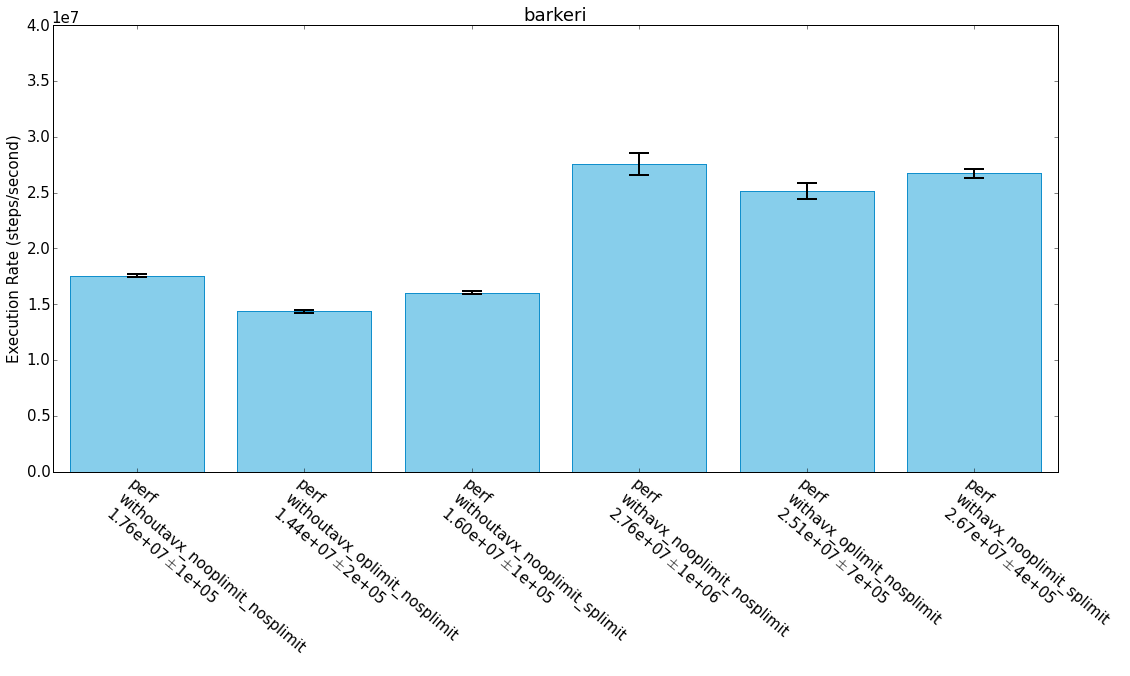

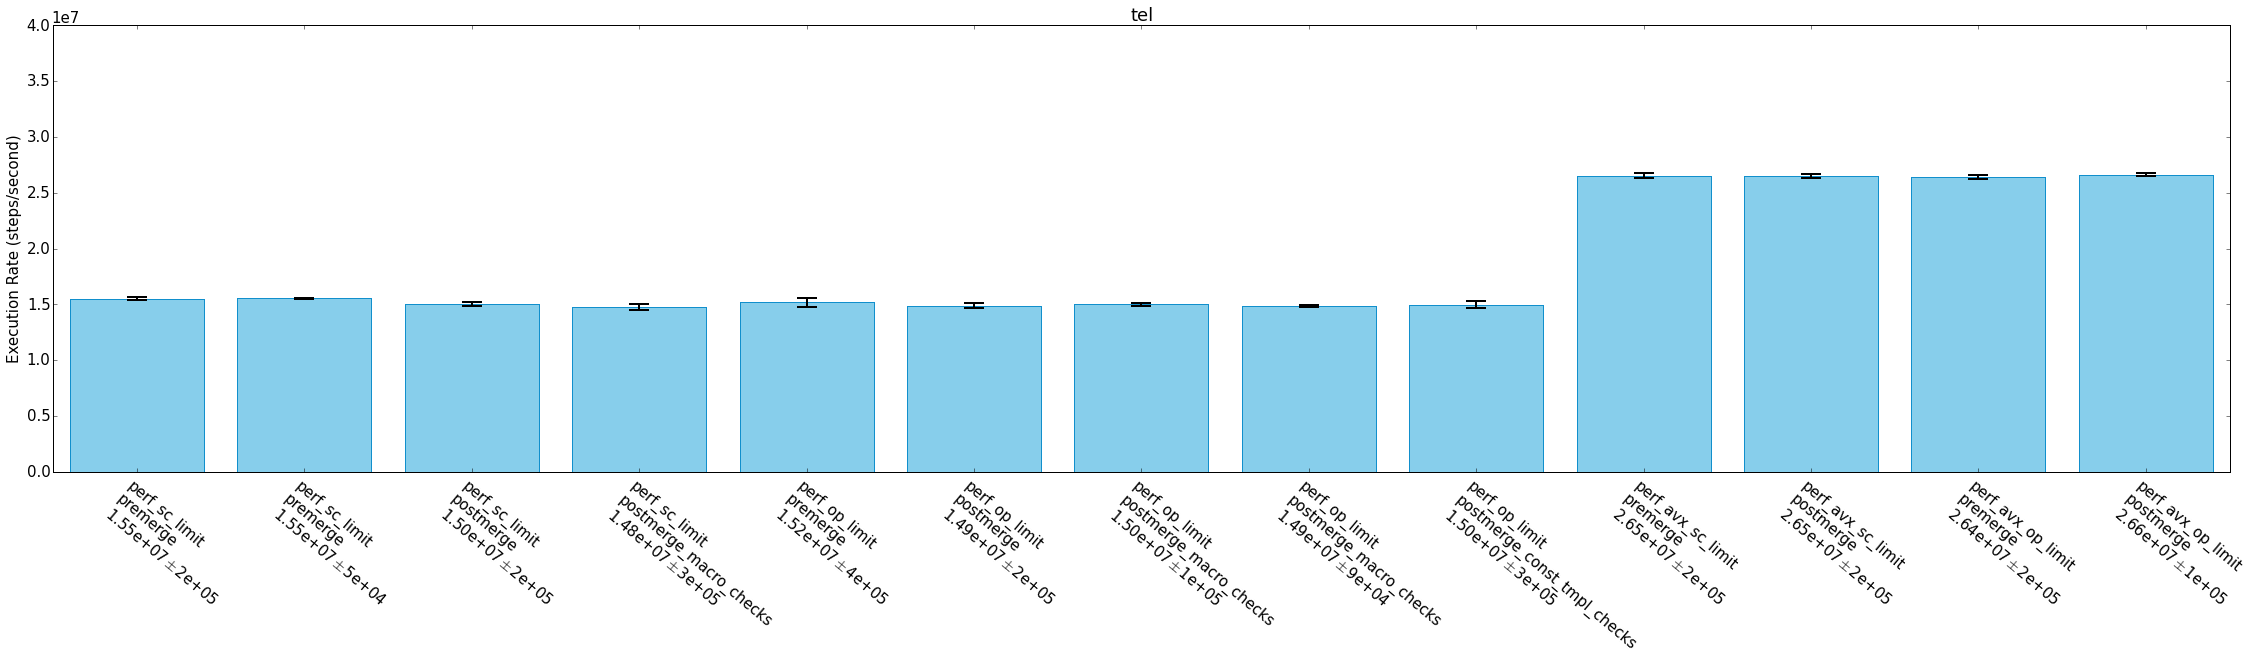

In [13]:
# Plot the timing data.
plt.close('all')
matplotlib.rcParams.update({'font.size': 15})

for i,host in enumerate(hostDict.keys()):
    fig = plt.figure(figsize=(3*len(hostDict[host].keys()), 8))
    ax = fig.gca()
    
    times=[]
    timesErr=[]
    testPlotNames=[]
    for tup,testTimes in hostDict[host].items():
        testPlotName = '\n'.join([tup[1], tup[2], '%1.2e$\pm$%1.0e' % (mean(testTimes), std(testTimes))])
        
        times.append(mean(testTimes))
        timesErr.append(std(testTimes))
        testPlotNames.append(testPlotName)
#     plt.subplot(len(hostDict),1,i+1)
    
    xticks = (arange(0,len(testPlotNames))*.25) + .25
    ax.bar(xticks, times, yerr=timesErr, align='center', color='skyblue', edgecolor='#118FCC', error_kw={"ecolor":"k", "elinewidth":2,"capsize":10,"capthick":2}, width=.2)
    ax.set_ylabel('Execution Rate (steps/second)')
    ax.set_xticks(xticks)
    ax.set_xticklabels(testPlotNames, rotation=-40, horizontalalignment='left', multialignment='left', rotation_mode='anchor')
    ax.set_xlim(xticks[0] - .125, xticks[-1] + .125)
    ax.set_ylim([0,4e7])
    ax.set_title(host)
    print times
#     fig.tight_layout()
pass